**1. Importing packages**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**2. Imporing Obesity dataset**

In [122]:
df=pd.read_csv('/content/Obesity.csv')

**3. Data Analysing**

In [123]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [124]:
df.shape

(2111, 17)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [126]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [127]:
# Obtaing the summary of Numerical Variables
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [129]:
# Obtaing the summary of Categorical Variables
df.describe(include='O')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2102,2105,2111,2102,2111,2104,2111,2104,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1061,1722,1866,1758,2067,2008,1401,1576,351


**4. EDA**

<Axes: xlabel='Height', ylabel='Weight'>

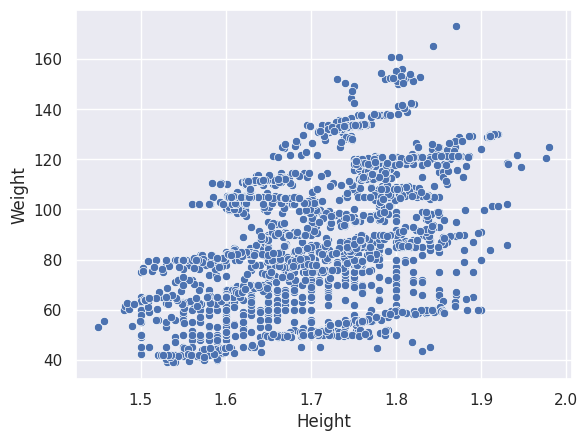

In [130]:
# Sactterplot
sns.scatterplot(data=df,x='Height',y='Weight')

<Axes: xlabel='Gender', ylabel='Weight'>

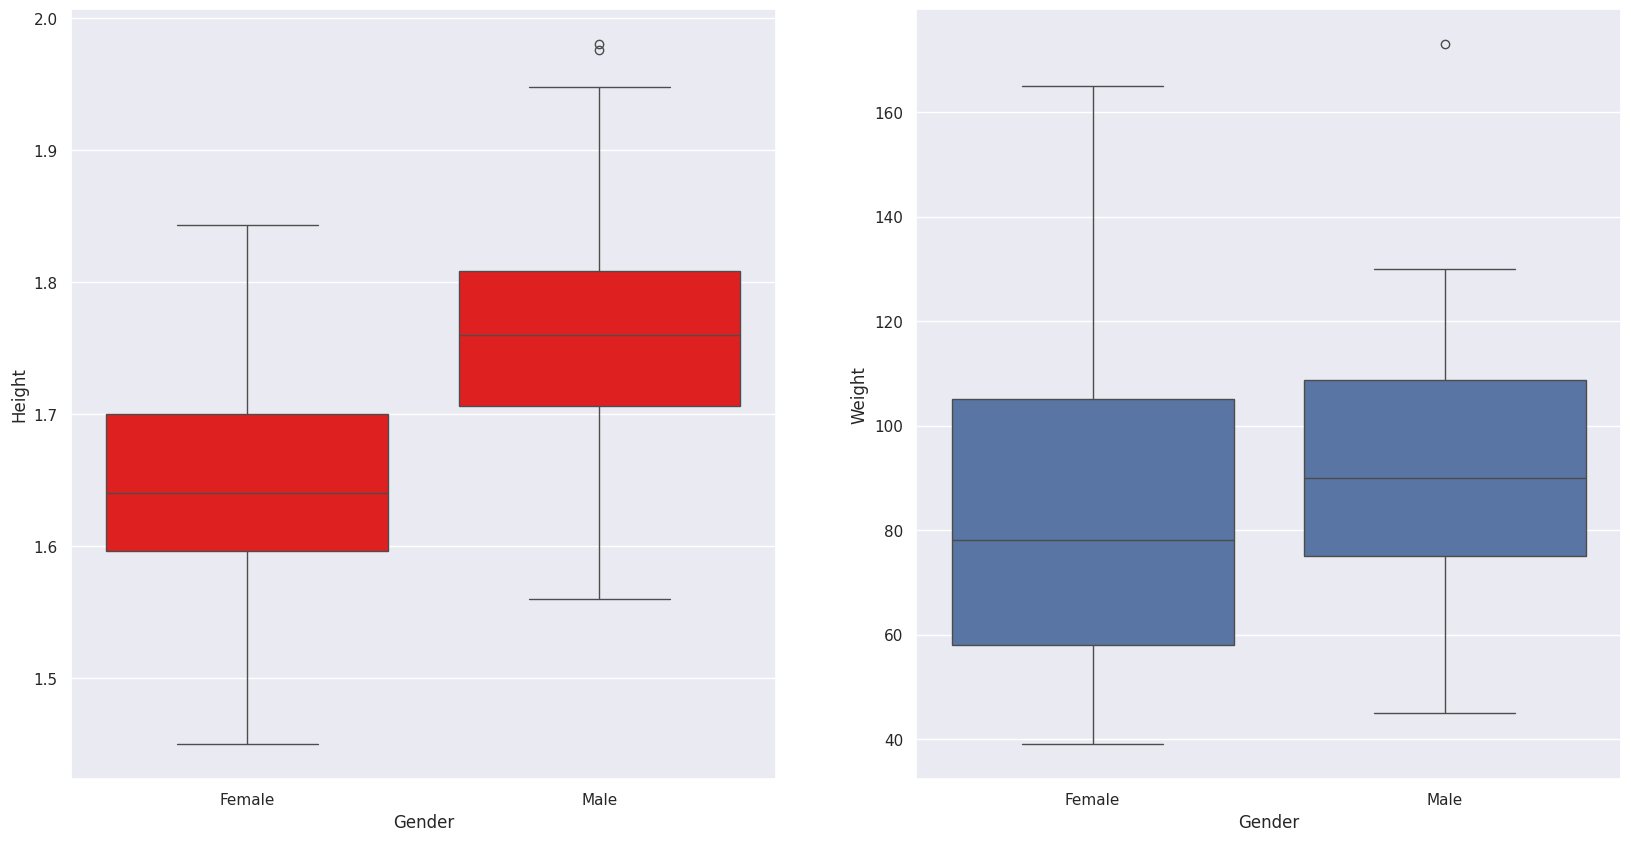

In [131]:
# Boxplot
sns.set()
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x='Gender',y='Height',data=df,color='red')

plt.subplot(1,2,2)
sns.boxplot(x='Gender',y='Weight',data=df)

<Axes: xlabel='family_history_with_overweight', ylabel='Weight'>

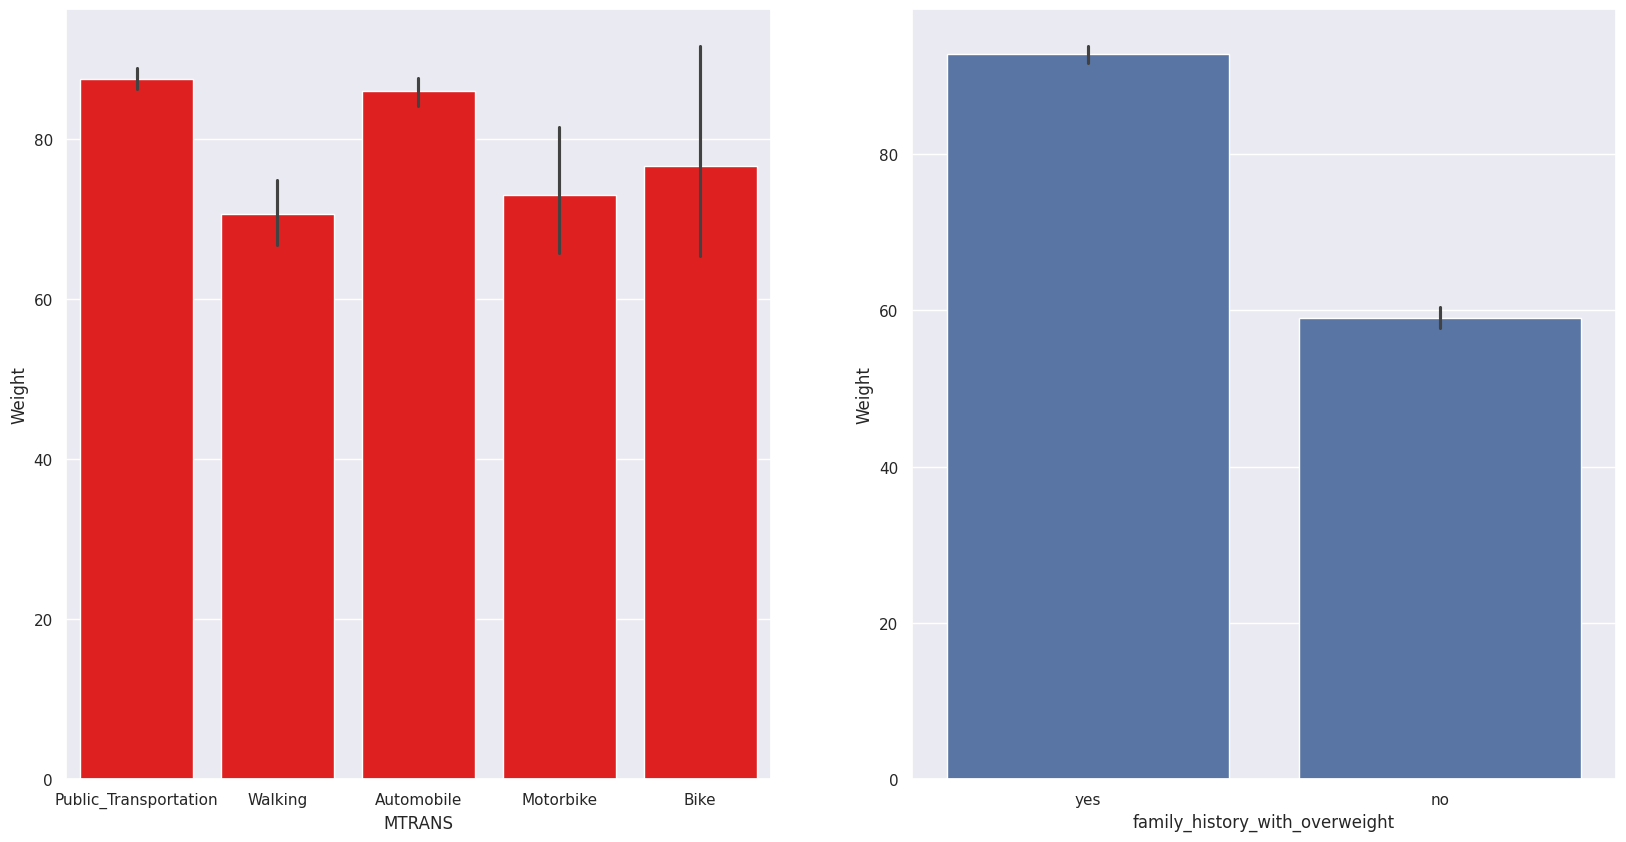

In [132]:
# Barplot
sns.set()
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(data=df,x='MTRANS',y='Weight',color='red')

plt.subplot(1,2,2)
sns.barplot(x='family_history_with_overweight',y='Weight',data=df)



**5. Data Preprocessing**

In [133]:
# Detecting null values
df.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [37]:
# Mean imputation

Mean=df.mean()
Mean_imp=df.fillna(Mean)
Mean_imp.head()
df1=Mean_imp
df1.isnull().sum()

<ipython-input-37-0a5e2c51d97e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mean=df.mean()


Gender                            9
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    6
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              9
SMOKE                             0
CH2O                              0
SCC                               7
FAF                               0
TUE                               0
CALC                              0
MTRANS                            7
NObeyesdad                        0
dtype: int64

In [134]:
# Detecting Duplicates
df.drop_duplicates(keep='first',inplace=True)

In [135]:
df.groupby('NObeyesdad').size()

NObeyesdad
Insufficient_Weight    267
Normal_Weight          282
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     277
Overweight_Level_II    290
dtype: int64

**6. Model Training**

In [136]:
x=df.iloc[:,0:15].values
y=df.iloc[:,16].values
x.shape,y.shape
print(x)
print(y)

[['Female' 21.0 1.62 ... 0.0 1.0 'no']
 ['Female' 21.0 1.52 ... 3.0 0.0 'Sometimes']
 ['Male' 23.0 1.8 ... 2.0 1.0 'Frequently']
 ...
 ['Female' 22.524036 1.752206 ... 1.414209 0.646288 'Sometimes']
 ['Female' 24.361936 1.73945 ... 1.139107 0.586035 'Sometimes']
 ['Female' 23.664709 1.738836 ... 1.026452 0.714137 'Sometimes']]
['Normal_Weight' 'Normal_Weight' 'Normal_Weight' ... 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_Type_III']


In [150]:
# Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1044, 15), (1044, 15), (1044,), (1044,))

In [151]:
# Encoding train dataset

## 1. Encoding the Independent Variable
for i in range(0, 15):
    x_train[:,i] = le_x.fit_transform(x_train[:,i])

x_train[:,14] = le_x.fit_transform(x_train[:,14])

## 2. Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [152]:
# Encoding test dataset

## 1. Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_X = LabelEncoder()
for i in range(0, 15):
    x_test[:,i] = le_x.fit_transform(x_test[:,i])
x_test[:,14] = le_x.fit_transform(x_test[:,14])

## 2. Encoding the Dependent Variable
le_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [153]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

**7. Prediction**

In [154]:
# Predicting the Test set results
# Decoding into original values
y_pred = classifier.predict(x_test)

In [155]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.7758620689655172


In [156]:
# Predicting the Test set results
# Decoding into original values
y_pred = labelencoder_y.inverse_transform(classifier.predict(x_test))
print(y_pred)


['Insufficient_Weight' 'Obesity_Type_I' 'Obesity_Type_I' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']


In [157]:
y_pred.shape


(1044,)